<a href="https://colab.research.google.com/github/faruk17035/3rd-Work/blob/main/Copy_of_set4_PAAC%2BUbiquitin%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
from pandas import read_csv
file_name = '/content/drive/MyDrive/dataset/set4/PAAC_set4.csv'
df = pd.read_csv(file_name)
#print(df.head()) # print the first 5 rows
df

,PAAC1,PAAC2,PAAC3,PAAC4,PAAC5,PAAC6,PAAC7,PAAC8,PAAC9,PAAC10,...,PAAC26,PAAC27,PAAC28,PAAC29,PAAC30,PAAC31,PAAC32,PAAC33,PAAC34,Target
0,0.419183,0.000000,0.838366,0.419183,0.00000,0.419183,2.515099,0.838366,0.000000,0.419183,...,0.036380,0.045900,0.043365,0.033756,0.044384,0.044099,0.046178,0.038228,0.040030,1
1,0.000000,0.428440,0.428440,1.713759,0.00000,0.000000,0.856879,0.856879,0.000000,0.856879,...,0.030927,0.048900,0.041737,0.042691,0.032421,0.040099,0.043921,0.054399,0.043498,1
2,0.393259,0.393259,0.393259,0.393259,0.00000,0.393259,1.179776,0.000000,0.393259,0.786518,...,0.054790,0.035906,0.059732,0.040130,0.051415,0.056425,0.037721,0.051927,0.022336,1
3,0.392759,0.785518,0.000000,0.392759,0.00000,1.178277,1.571036,0.000000,0.000000,0.392759,...,0.051130,0.040844,0.024033,0.047743,0.058581,0.032913,0.032390,0.050491,0.055199,1
4,3.149282,0.449897,1.349692,0.899795,0.00000,0.449897,1.349692,0.000000,0.000000,0.449897,...,0.033054,0.032509,0.046175,0.037245,0.034576,0.041872,0.034799,0.029539,0.048914,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,0.000000,0.000000,0.803190,0.401595,0.00000,0.000000,0.803190,0.401595,0.000000,2.409570,...,0.047279,0.040930,0.045856,0.042741,0.037102,0.051245,0.046160,0.046941,0.043825,0
4604,0.000000,0.401442,0.802885,0.802885,0.00000,0.000000,0.802885,0.802885,0.000000,0.802885,...,0.046812,0.034486,0.040316,0.033441,0.041429,0.041329,0.038051,0.051707,0.055172,0
4605,0.727584,0.363792,0.363792,0.363792,0.00000,0.363792,1.455167,0.363792,0.000000,0.363792,...,0.035729,0.047250,0.040410,0.048496,0.047384,0.042312,0.054959,0.046394,0.055619,0
4606,0.554510,0.000000,1.663530,0.000000,0.55451,1.109020,1.663530,1.109020,0.000000,0.554510,...,0.034099,0.031799,0.034772,0.026557,0.035774,0.024593,0.039705,0.034196,0.024691,0


In [4]:
df.shape

(4608, 35)

In [5]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting 
target = "Target"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(4608, 34)
(4608,)


Text(0, 0.5, 'Frequency')

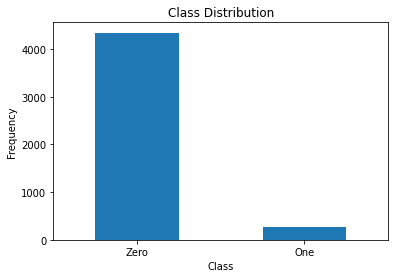

In [6]:
count_classes = pd.value_counts(df['Target'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [7]:
One = df[df['Target']==1]

Zero = df[df['Target']==0]

In [8]:
print(Zero.shape,One.shape)

(4345, 35) (263, 35)


## Applying ADASYN

In [9]:
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state = 20)
X_res,y_res=sm.fit_resample(X,Y)

In [10]:
print(X_res.shape)
print(y_res.shape)

(8609, 34)
(8609,)


In [11]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [ ]:
### Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',C=50,gamma=0.0001, probability=True)
#classifier = SVC()

In [ ]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[272   7]
 [  3 294]]


0.9826388888888888

In [ ]:
from sklearn.metrics import roc_auc_score
print("AUC = ",roc_auc_score(y_test,y_pred))

AUC =  0.9824046920821115


In [ ]:
from sklearn.metrics import matthews_corrcoef,confusion_matrix
matthews_corrcoef(y_test,y_pred)

0.9653221034161232

In [ ]:
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 272
True Negatives: 294
False Positives: 7
False Negatives: 3


In [ ]:
sensitivity=(TP/(TP+FN))
sensitivity

0.9890909090909091

In [ ]:
specificity = (TN/(TN+FP))
specificity

0.9767441860465116

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.29 %
Standard Deviation: 2.11 %


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = cross_val_predict(classifier, X_train, y_train, cv=10)
cmann = confusion_matrix(y_train, y_pred)
print(cmann)
accuracy = (cmann[0][0]+cmann[1][1])/(cmann[0][1] + cmann[1][0] +cmann[0][0] +cmann[1][1]) 
print(accuracy*100)
ACC = accuracy_score(y_train,y_pred)
print(ACC)

[[383  19]
 [  2 371]]
97.29032258064517
0.9729032258064516


In [ ]:
from sklearn.metrics import roc_auc_score
print("AUC = ",roc_auc_score(y_train,y_pred))

AUC =  0.973687194056527


In [ ]:
from sklearn.metrics import matthews_corrcoef,confusion_matrix
#matthews_corrcoef(y_test,y_pred)
matthews_corrcoef(y_train,y_pred)

0.9467305983559786

In [ ]:
TP = cmann[0][0]
TN = cmann[1][1]
FP = cmann[0][1]
FN = cmann[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 383
True Negatives: 371
False Positives: 19
False Negatives: 2


In [ ]:
sensitivity=(TP/(TP+FN))
sensitivity

0.9948051948051948

In [ ]:
specificity = (TN/(TN+FP))
specificity

0.9512820512820512

In [ ]:
precision = (TP/(TP+FP))
recall = (TP/(TP+FN))
print(precision)
print(recall)

0.9527363184079602
0.9948051948051948


In [ ]:
f1 = (2*(precision*recall))/(precision+recall)
f1

0.9733163913595935